## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  48.144828   786.649836  0.647698  5.820326  1.512558
1  22.054416   929.981834  0.594714  3.085831  1.363007
2  81.628850   253.468968  0.358250  4.259298  0.776874
3   8.634731  1343.698880  0.286563  2.146693  1.535243
4  60.983421   916.413115  0.739742  4.889042  1.563487


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9709004	total: 69.4ms	remaining: 1m 9s
1:	learn: 0.9615223	total: 69.9ms	remaining: 34.9s
2:	learn: 0.9525633	total: 70.4ms	remaining: 23.4s
3:	learn: 0.9438257	total: 70.9ms	remaining: 17.6s
4:	learn: 0.9341697	total: 71.3ms	remaining: 14.2s
5:	learn: 0.9236065	total: 71.8ms	remaining: 11.9s
6:	learn: 0.9166178	total: 72.2ms	remaining: 10.2s
7:	learn: 0.9077390	total: 72.8ms	remaining: 9.03s
8:	learn: 0.9001186	total: 73.3ms	remaining: 8.07s
9:	learn: 0.8908325	total: 73.7ms	remaining: 7.3s
10:	learn: 0.8839724	total: 74.1ms	remaining: 6.67s
11:	learn: 0.8765714	total: 74.7ms	remaining: 6.15s
12:	learn: 0.8678767	total: 75.3ms	remaining: 5.71s
13:	learn: 0.8586879	total: 75.7ms	remaining: 5.33s
14:	learn: 0.8506325	total: 76.2ms	remaining: 5s
15:	learn: 0.8420324	total: 76.7ms	remaining: 4.72s
16:	learn: 0.8334899	total: 77.2ms	remaining: 4.46s
17:	learn: 0.8271589	total: 77.7ms	remaining: 4.24s
18:	learn: 0.8194794	total: 78.2ms	remaining: 4.

87:	learn: 0.4918179	total: 109ms	remaining: 1.13s
88:	learn: 0.4883980	total: 110ms	remaining: 1.12s
89:	learn: 0.4846547	total: 110ms	remaining: 1.11s
90:	learn: 0.4815928	total: 111ms	remaining: 1.11s
91:	learn: 0.4791754	total: 111ms	remaining: 1.1s
92:	learn: 0.4762840	total: 112ms	remaining: 1.09s
93:	learn: 0.4729691	total: 112ms	remaining: 1.08s
94:	learn: 0.4701773	total: 113ms	remaining: 1.07s
95:	learn: 0.4675955	total: 113ms	remaining: 1.06s
96:	learn: 0.4647090	total: 114ms	remaining: 1.06s
97:	learn: 0.4614434	total: 114ms	remaining: 1.05s
98:	learn: 0.4591639	total: 115ms	remaining: 1.04s
99:	learn: 0.4560929	total: 115ms	remaining: 1.03s
100:	learn: 0.4545792	total: 115ms	remaining: 1.03s
101:	learn: 0.4519978	total: 116ms	remaining: 1.02s
102:	learn: 0.4489940	total: 116ms	remaining: 1.01s
103:	learn: 0.4466196	total: 117ms	remaining: 1.01s
104:	learn: 0.4437863	total: 117ms	remaining: 1s
105:	learn: 0.4407456	total: 118ms	remaining: 994ms
106:	learn: 0.4378638	total: 

266:	learn: 0.2238060	total: 186ms	remaining: 511ms
267:	learn: 0.2235408	total: 187ms	remaining: 510ms
268:	learn: 0.2223381	total: 187ms	remaining: 509ms
269:	learn: 0.2220767	total: 188ms	remaining: 507ms
270:	learn: 0.2217080	total: 188ms	remaining: 506ms
271:	learn: 0.2213984	total: 189ms	remaining: 505ms
272:	learn: 0.2202758	total: 189ms	remaining: 503ms
273:	learn: 0.2199157	total: 189ms	remaining: 502ms
274:	learn: 0.2195492	total: 190ms	remaining: 500ms
275:	learn: 0.2191801	total: 190ms	remaining: 499ms
276:	learn: 0.2187166	total: 191ms	remaining: 498ms
277:	learn: 0.2182842	total: 191ms	remaining: 497ms
278:	learn: 0.2179936	total: 192ms	remaining: 495ms
279:	learn: 0.2169503	total: 192ms	remaining: 494ms
280:	learn: 0.2166818	total: 193ms	remaining: 493ms
281:	learn: 0.2154011	total: 193ms	remaining: 491ms
282:	learn: 0.2150698	total: 193ms	remaining: 490ms
283:	learn: 0.2147355	total: 194ms	remaining: 489ms
284:	learn: 0.2144594	total: 194ms	remaining: 488ms
285:	learn: 

509:	learn: 0.1071964	total: 291ms	remaining: 280ms
510:	learn: 0.1070973	total: 292ms	remaining: 279ms
511:	learn: 0.1067353	total: 292ms	remaining: 278ms
512:	learn: 0.1066575	total: 292ms	remaining: 278ms
513:	learn: 0.1062906	total: 293ms	remaining: 277ms
514:	learn: 0.1059450	total: 293ms	remaining: 276ms
515:	learn: 0.1058013	total: 293ms	remaining: 275ms
516:	learn: 0.1056596	total: 294ms	remaining: 275ms
517:	learn: 0.1050451	total: 294ms	remaining: 274ms
518:	learn: 0.1049948	total: 295ms	remaining: 273ms
519:	learn: 0.1045911	total: 295ms	remaining: 272ms
520:	learn: 0.1042680	total: 296ms	remaining: 272ms
521:	learn: 0.1041944	total: 296ms	remaining: 271ms
522:	learn: 0.1041459	total: 296ms	remaining: 270ms
523:	learn: 0.1037881	total: 297ms	remaining: 270ms
524:	learn: 0.1033881	total: 297ms	remaining: 269ms
525:	learn: 0.1030473	total: 298ms	remaining: 268ms
526:	learn: 0.1026564	total: 298ms	remaining: 267ms
527:	learn: 0.1025232	total: 298ms	remaining: 267ms
528:	learn: 

694:	learn: 0.0687137	total: 368ms	remaining: 161ms
695:	learn: 0.0686144	total: 368ms	remaining: 161ms
696:	learn: 0.0685908	total: 369ms	remaining: 160ms
697:	learn: 0.0685415	total: 369ms	remaining: 160ms
698:	learn: 0.0683518	total: 370ms	remaining: 159ms
699:	learn: 0.0683314	total: 370ms	remaining: 158ms
700:	learn: 0.0682501	total: 370ms	remaining: 158ms
701:	learn: 0.0680975	total: 371ms	remaining: 157ms
702:	learn: 0.0679657	total: 371ms	remaining: 157ms
703:	learn: 0.0679175	total: 372ms	remaining: 156ms
704:	learn: 0.0678208	total: 372ms	remaining: 156ms
705:	learn: 0.0677735	total: 373ms	remaining: 155ms
706:	learn: 0.0676779	total: 373ms	remaining: 155ms
707:	learn: 0.0676554	total: 373ms	remaining: 154ms
708:	learn: 0.0673020	total: 374ms	remaining: 153ms
709:	learn: 0.0670923	total: 374ms	remaining: 153ms
710:	learn: 0.0669448	total: 375ms	remaining: 152ms
711:	learn: 0.0669241	total: 375ms	remaining: 152ms
712:	learn: 0.0666759	total: 375ms	remaining: 151ms
713:	learn: 

945:	learn: 0.0377851	total: 473ms	remaining: 27ms
946:	learn: 0.0376719	total: 473ms	remaining: 26.5ms
947:	learn: 0.0375387	total: 474ms	remaining: 26ms
948:	learn: 0.0374376	total: 474ms	remaining: 25.5ms
949:	learn: 0.0373670	total: 475ms	remaining: 25ms
950:	learn: 0.0372572	total: 475ms	remaining: 24.5ms
951:	learn: 0.0371501	total: 476ms	remaining: 24ms
952:	learn: 0.0370816	total: 476ms	remaining: 23.5ms
953:	learn: 0.0369721	total: 476ms	remaining: 23ms
954:	learn: 0.0369244	total: 477ms	remaining: 22.5ms
955:	learn: 0.0368207	total: 477ms	remaining: 22ms
956:	learn: 0.0367537	total: 478ms	remaining: 21.5ms
957:	learn: 0.0367068	total: 479ms	remaining: 21ms
958:	learn: 0.0365866	total: 479ms	remaining: 20.5ms
959:	learn: 0.0365404	total: 479ms	remaining: 20ms
960:	learn: 0.0364402	total: 480ms	remaining: 19.5ms
961:	learn: 0.0363948	total: 480ms	remaining: 19ms
962:	learn: 0.0362972	total: 480ms	remaining: 18.5ms
963:	learn: 0.0362591	total: 481ms	remaining: 18ms
964:	learn: 0

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

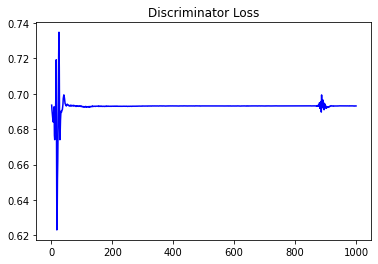

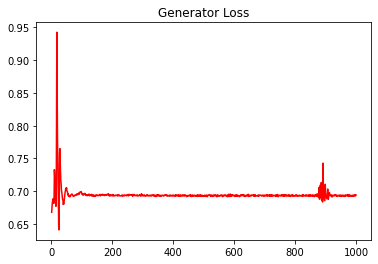

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.4151909818478459


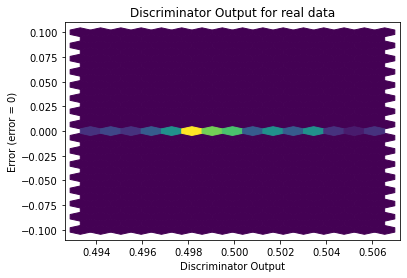

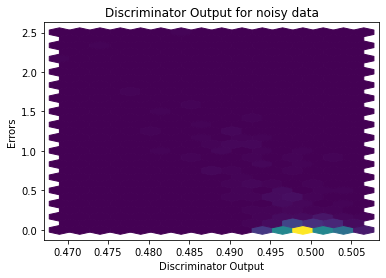

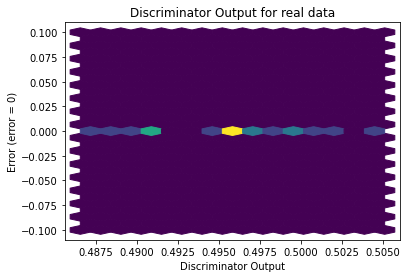

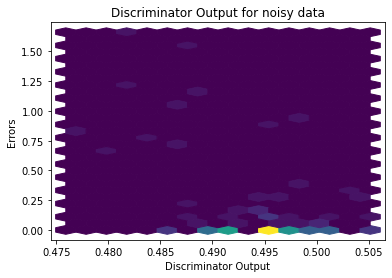

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


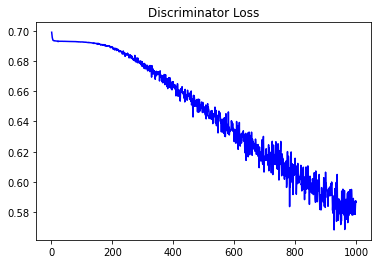

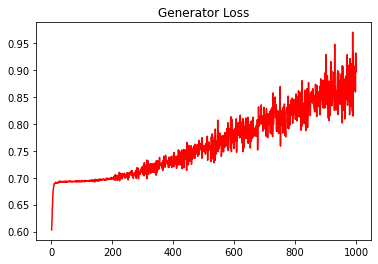

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.4405291058863552


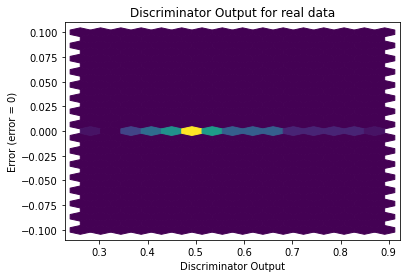

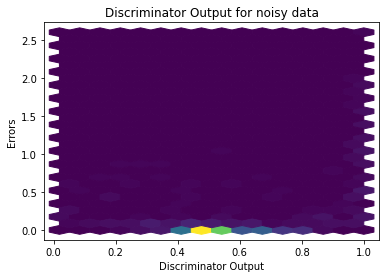

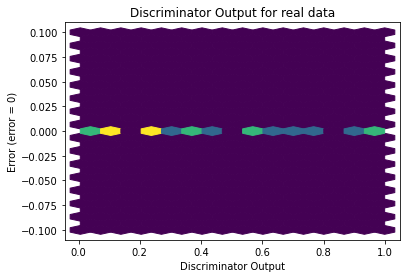

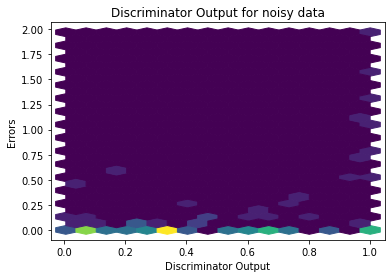

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
